# 0. Import Dependencies and Pretrained Model

In [32]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [33]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# 1. Preprocess Image and Load

In [34]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [35]:
content_image = load_image('/content/content_Image_1.jpg')
style_image = load_image('/content/style_Image_1.jpg')

# 2. Visualize Output

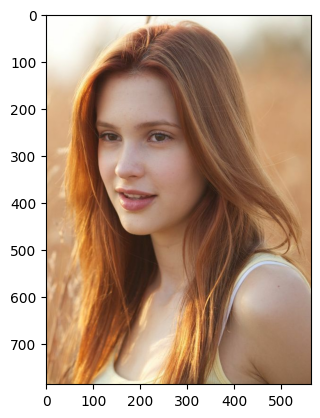

In [36]:
content_image.shape
plt.imshow(np.squeeze(content_image))
plt.show()

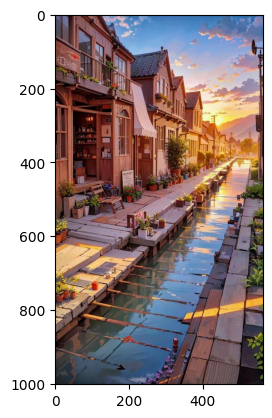

In [37]:
plt.imshow(np.squeeze(style_image))
plt.show()

# 3. Stylize Image

In [38]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

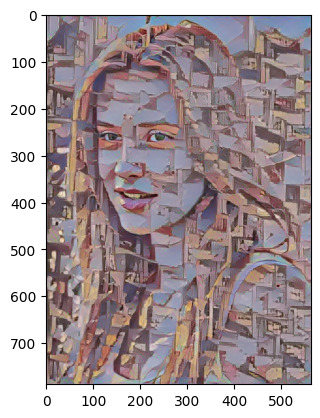

In [39]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [40]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True

# 4. For GUI Implementation

In [41]:
%%writefile neuralStyleTransferGUI.py

import tkinter as tk
from tkinter import *
from tkinter import filedialog
from PIL import Image, ImageTk
import os
import numpy as np
import cv2
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

class Window(Frame):
    def __init__(self, master=None):
        Frame.__init__(self, master)

        self.master = master
        self.master.title("Neural Style Transfer GUI")
        self.pack(fill=BOTH, expand=1)

        self.canvas_frame = Frame(self)
        self.canvas_frame.pack(side=TOP, padx=10, pady=10)

        self.content_canvas = tk.Canvas(self.canvas_frame)
        self.content_canvas.pack(side=LEFT, fill=tk.BOTH, expand=True)

        self.style_canvas = tk.Canvas(self.canvas_frame)
        self.style_canvas.pack(side=LEFT, fill=tk.BOTH, expand=True)

        self.stylized_canvas = tk.Canvas(self.canvas_frame)
        self.stylized_canvas.pack(side=LEFT, fill=tk.BOTH, expand=True)

        self.button_frame = Frame(self)
        self.button_frame.pack(side=BOTTOM, padx=10, pady=10)

        self.content_button = Button(self.button_frame, text="Upload Content Image", command=self.uploadContentImage)
        self.content_button.pack(side=LEFT, padx=10, pady=10)

        self.style_button = Button(self.button_frame, text="Upload Style Image", command=self.uploadStyleImage)
        self.style_button.pack(side=LEFT, padx=10, pady=10)

        self.transfer_button = Button(self.button_frame, text="Apply Style Transfer", command=self.applyStyleTransfer)
        self.transfer_button.pack(side=LEFT, padx=10, pady=10)

        self.content_image = None
        self.style_image = None
        self.stylized_image = None

    def uploadContentImage(self):
        filename = filedialog.askopenfilename(initialdir=os.getcwd())
        if not filename:
            return
        load = Image.open(filename)

        load = load.resize((480, 360), Image.ANTIALIAS)

        if self.content_image is None:
            w, h = load.size
            self.content_render = ImageTk.PhotoImage(load)
            self.content_image = self.content_canvas.create_image((w / 2, h / 2), image=self.content_render)
        else:
            self.content_canvas.delete(self.content_image)
            w, h = load.size
            self.content_render = ImageTk.PhotoImage(load)
            self.content_image = self.content_canvas.create_image((w / 2, h / 2), image=self.content_render)

        self.content_path = filename

    def uploadStyleImage(self):
        filename = filedialog.askopenfilename(initialdir=os.getcwd())
        if not filename:
            return
        load = Image.open(filename)

        load = load.resize((480, 360), Image.ANTIALIAS)

        if self.style_image is None:
            w, h = load.size
            self.style_render = ImageTk.PhotoImage(load)
            self.style_image = self.style_canvas.create_image((w / 2, h / 2), image=self.style_render)
        else:
            self.style_canvas.delete(self.style_image)
            w, h = load.size
            self.style_render = ImageTk.PhotoImage(load)
            self.style_image = self.style_canvas.create_image((w / 2, h / 2), image=self.style_render)

        self.style_path = filename

    def applyStyleTransfer(self):
        if self.content_path is None or self.style_path is None:
            return

        content_image = load_image(self.content_path)
        style_image = load_image(self.style_path)

        model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

        stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

        stylized_image = np.squeeze(stylized_image, axis=0)
        stylized_image = np.array(stylized_image * 255, dtype=np.uint8)

        img = Image.fromarray(stylized_image)
        img = img.resize((480, 360), Image.ANTIALIAS)

        if self.stylized_image is None:
            w, h = img.size
            self.stylized_render = ImageTk.PhotoImage(img)
            self.stylized_image = self.stylized_canvas.create_image((w / 2, h / 2), image=self.stylized_render)
        else:
            self.stylized_canvas.delete(self.stylized_image)
            w, h = img.size
            self.stylized_render = ImageTk.PhotoImage(img)
            self.stylized_image = self.stylized_canvas.create_image((w / 2, h / 2), image=self.stylized_render)

        img.save("generated_img.jpg")

def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

root = tk.Tk()
root.geometry("1500x400")
root.title("Neural Style Transfer GUI")

app = Window(root)
app.pack(fill=tk.BOTH, expand=1)
root.mainloop()



Writing neuralStyleTransferGUI.py
